In [1]:
! pip3 install seaborn -U

    100% |████████████████████████████████| 225kB 8.4MB/s ta 0:00:01
    100% |████████████████████████████████| 12.4MB 2.7MB/s eta 0:00:01  4% |█▎                              | 512kB 19.7MB/s eta 0:00:01    16% |█████▏                          | 2.0MB 33.2MB/s eta 0:00:01    29% |█████████▋                      | 3.7MB 32.7MB/s eta 0:00:01    93% |█████████████████████████████▉  | 11.6MB 32.8MB/s eta 0:00:01
    100% |████████████████████████████████| 20.2MB 1.5MB/s eta 0:00:01   28% |█████████▎                      | 5.8MB 29.8MB/s eta 0:00:01    50% |████████████████                | 10.1MB 30.5MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 9.5MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
scikit-image 0.14.2 has requirement dask[array]>=1.0.0, but you'll have dask 0.16.1 which is incompatible.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1

In [2]:
# import library
import pandas as pd
import requests
import tweepy
import os
import numpy as np

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load cleaned CSV
df = pd.read_csv('twitter_archive_master.csv')

In [4]:
df

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,Prediction,Confidence,Dog_or_not
0,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True
1,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True
2,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True
3,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True
4,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True
5,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True
6,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,https://twitter.com/dog_rates/status/890609185...,13.0,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True
7,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,https://twitter.com/dog_rates/status/890240255...,14.0,10,Cassie,Doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True
8,NaN,NaN,2017-07-26 00:31:25,"[0, 130]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890006600089468928, 'id_str'...",31166,False,This is Koda. He is a South Australian decksha...,NaN,...,https://twitter.com/dog_rates/status/890006608...,13.0,10,Koda,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True
9,NaN,NaN,2017-07-25 16:11:53,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 889880888800096258, 'id_str'...",28268,False,This is Bruno. He is a service shark. Only get...,NaN,...,https://twitter.com/dog_rates/status/889880896...,13.0,10,Bruno,NaN,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True


In [5]:
# convert type of "timestamp"
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
# show info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189 entries, 0 to 1188
Data columns (total 50 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       1189 non-null object
display_text_range               1189 non-null object
entities                         1189 non-null object
extended_entities                1189 non-null object
favorite_count                   1189 non-null int64
favorited                        1189 non-null bool
full_text                        1189 non-null object
geo                              0 non-null float64
id                               1189 non-null int64
id_str                           1189 non-null int64
in_reply_to_screen_name          0 non-null float64
in_reply_to_status_id_x          0 non-null float64
in_reply_to_status_id_str        0 non-null float64
in_reply_to_user_id_x            0 non-null float64
in_reply_to_user_id_str          0 non-null floa

# Analyze

### (1) Is there a relationship between rate of WeRateDogs and fav, rtwt?

(0.0, 20.0)

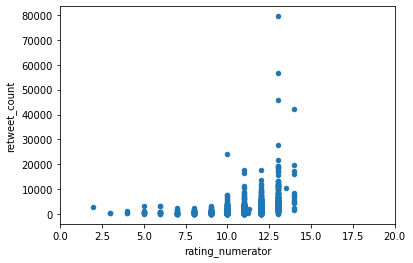

In [7]:
# plot numerator vs. retweet count
df.plot.scatter(x='rating_numerator', y='retweet_count')
plt.xlim([0,20])

(0.0, 20.0)

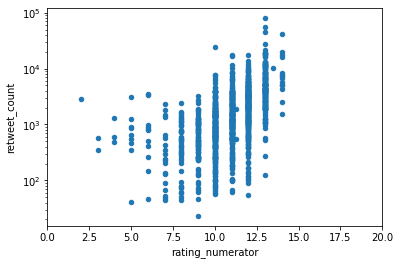

In [8]:
# plot numerator vs. retweet count in log
df.plot.scatter(x='rating_numerator', y='retweet_count', logy=True)
plt.xlim([0,20])

(0.0, 20.0)

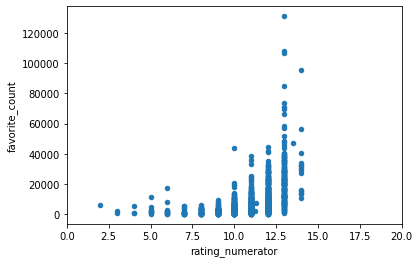

In [9]:
df.plot.scatter(x='rating_numerator', y='favorite_count')
plt.xlim([0,20])

(0.0, 20.0)

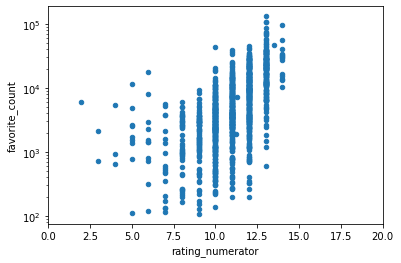

In [10]:
df.plot.scatter(x='rating_numerator', y='favorite_count',logy=True)
plt.xlim([0,20])

## Insight 1 : There are relationships between both rate of WeRateDogs and fav, rtwt.

### (2)What type of dog is most favorited and retweeted?

In [11]:
top20 = df.sort_values('retweet_count', ascending=False)[0:20]['id'].values
for i in range(len(top20)):
    print(i)
    print(df[df['id'] == top20[i]]['retweet_count'].values[0])
    print(df[df['id'] == top20[i]]['dog_type'].values[0])
    print(df[df['id'] == top20[i]]['Prediction'].values[0])

0
79515
Doggo
Labrador_retriever
1
56625
nan
Chihuahua
2
45849
nan
English_springer
3
42228
Doggo
standard_poodle
4
27680
nan
golden_retriever
5
24319
nan
Labrador_retriever
6
21840
nan
chow
7
19669
Puppo
Rottweiler
8
19297
nan
Labrador_retriever
9
19196
multiple
flat-coated_retriever
10
18781
nan
Pembroke
11
18627
nan
boxer
12
18497
Floofer
Samoyed
13
17621
multiple
golden_retriever
14
17605
nan
Great_Pyrenees
15
17300
nan
Chesapeake_Bay_retriever
16
17209
Pupper
Pomeranian
17
16716
nan
Pomeranian
18
16628
nan
golden_retriever
19
16267
nan
French_bulldog


(-1.0, 10.0)

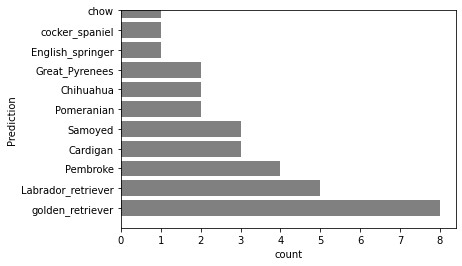

In [12]:
top50 = df.sort_values('retweet_count', ascending=False)[0:50]
ax = sns.countplot(y="Prediction", data=top50, color="gray", order = top50['Prediction'].value_counts().index)
plt.ylim([-1,10])

(-1.0, 10.0)

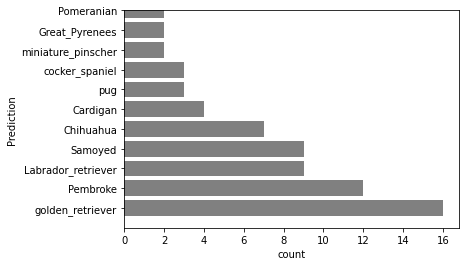

In [13]:
top100 = df.sort_values('retweet_count', ascending=False)[0:100]
ax = sns.countplot(y="Prediction", data=top100, color="gray", order = top100['Prediction'].value_counts().index)
plt.ylim([-1,10])

(-1.0, 10.0)

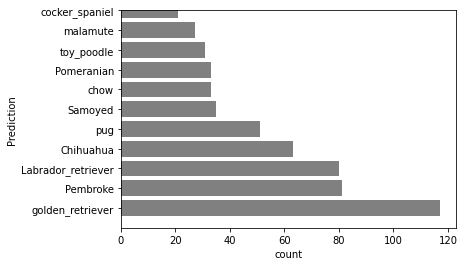

In [14]:
sns.countplot(y="Prediction", data=df, color="gray", order = df['Prediction'].value_counts().index)
plt.ylim([-1,10])

(-1.0, 4.0)

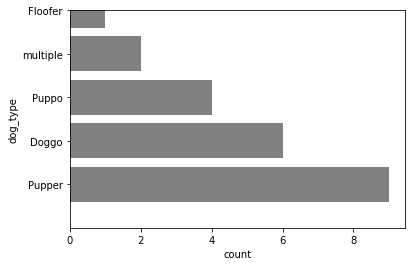

In [15]:
top100 = df.sort_values('retweet_count', ascending=False)[0:100]
sns.countplot(y="dog_type", data=top100, color="gray", order = top100['dog_type'].value_counts().index)
plt.ylim([-1,5])

(0.0, 25000.0)

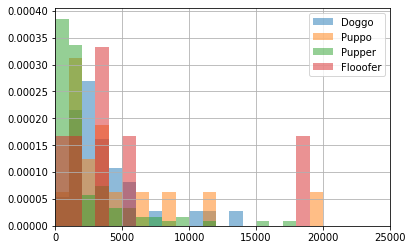

In [16]:
ax = df[df['dog_type']=='Doggo']['retweet_count'].hist(alpha=0.5, bins=np.linspace(0,20000,21), density=True)
df[df['dog_type']=='Puppo']['retweet_count'].hist(ax=ax, alpha=0.5, bins=np.linspace(0,20000,21), density=True)
df[df['dog_type']=='Pupper']['retweet_count'].hist(ax=ax, alpha=0.5, bins=np.linspace(0,20000,21), density=True)
df[df['dog_type']=='Floofer']['retweet_count'].hist(ax=ax, alpha=0.5, bins=np.linspace(0,20000,21), density=True)
ax.legend(['Doggo', 'Puppo', 'Pupper', 'Flooofer'])
plt.xlim([0, 25000])

(0.0, 20.0)

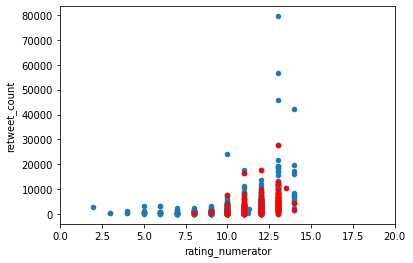

In [17]:
ax = df.plot.scatter(x='rating_numerator', y='retweet_count')
df[df["Prediction"] == "golden_retriever"].plot.scatter(x='rating_numerator', y='retweet_count', c='r', ax=ax)
plt.xlim([0,20])

(0.0, 20.0)

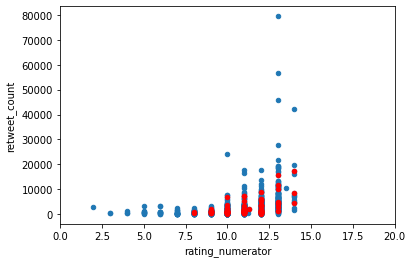

In [18]:
ax = df.plot.scatter(x='rating_numerator', y='retweet_count')
df[df["dog_type"] == 'Pupper'].plot.scatter(x='rating_numerator', y='retweet_count', c='r', ax=ax)
plt.xlim([0,20])

(0.0, 20.0)

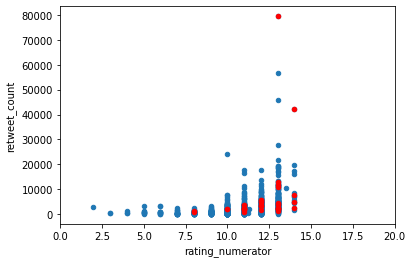

In [19]:
ax = df.plot.scatter(x='rating_numerator', y='retweet_count')
df[df["dog_type"] == 'Doggo'].plot.scatter(x='rating_numerator', y='retweet_count', c='r', ax=ax)
plt.xlim([0,20])

(0.0, 20000.0)

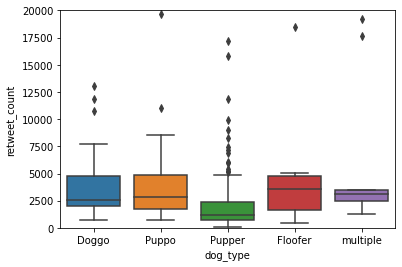

In [20]:
sns.boxplot(data=df, y='retweet_count', x='dog_type')
plt.ylim([0, 20000])

In [21]:
top20 = df.sort_values('favorite_count', ascending=False)[0:20]['id'].values
for i in range(len(top20)):
    print(i)
    print(df[df['id'] == top20[i]]['favorite_count'].values[0])
    print(df[df['id'] == top20[i]]['dog_type'].values[0])
    print(df[df['id'] == top20[i]]['Prediction'].values[0])

0
131075
Doggo
Labrador_retriever
1
107956
nan
English_springer
2
107015
nan
Chihuahua
3
95450
Doggo
standard_poodle
4
85011
nan
golden_retriever
5
73397
nan
Labrador_retriever
6
71144
nan
Chesapeake_Bay_retriever
7
69871
nan
Pembroke
8
66437
nan
chow
9
58302
nan
boxer
10
56848
nan
Pomeranian
11
56413
Puppo
Rottweiler
12
51522
nan
Saluki
13
48410
Doggo
golden_retriever
14
47844
multiple
flat-coated_retriever
15
46860
nan
golden_retriever
16
45880
nan
golden_retriever
17
44619
multiple
golden_retriever
18
43710
nan
Pembroke
19
43694
nan
Labrador_retriever


(-1.0, 10.0)

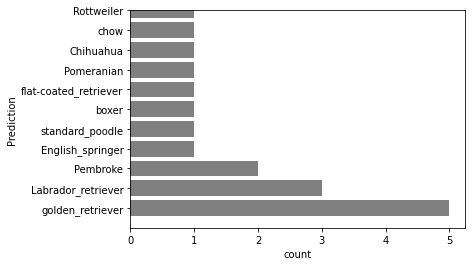

In [22]:
top20 = df.sort_values('favorite_count', ascending=False)[0:20]
ax = sns.countplot(y="Prediction", data=top20, color="gray", order = top20['Prediction'].value_counts().index)
plt.ylim([-1, 10])

(-1.0, 10.0)

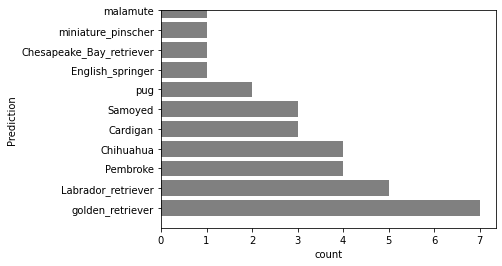

In [23]:
top50 = df.sort_values('favorite_count', ascending=False)[0:50]
ax = sns.countplot(y="Prediction", data=top50, color="gray", order = top50['Prediction'].value_counts().index)
plt.ylim([-1, 10])

(-1.0, 10.0)

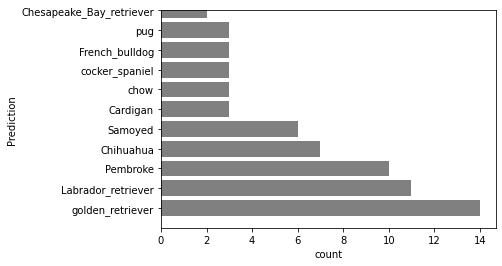

In [24]:
top100 = df.sort_values('favorite_count', ascending=False)[0:100]
ax = sns.countplot(y="Prediction", data=top100, color="gray", order = top100['Prediction'].value_counts().index)
plt.ylim([-1, 10])

(-1.0, 4.0)

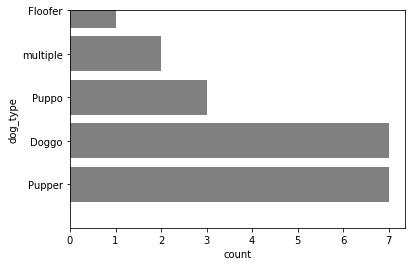

In [25]:
top100 = df.sort_values('favorite_count', ascending=False)[0:100]
sns.countplot(y="dog_type", data=top100, color="gray", order = top100['dog_type'].value_counts().index)
plt.ylim([-1, 4])

(-1.0, 10.0)

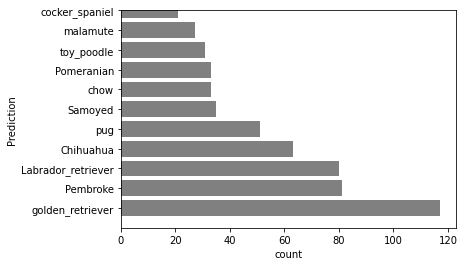

In [26]:
sns.countplot(y="Prediction", data=df, color="gray", order = df['Prediction'].value_counts().index)
plt.ylim([-1, 10])

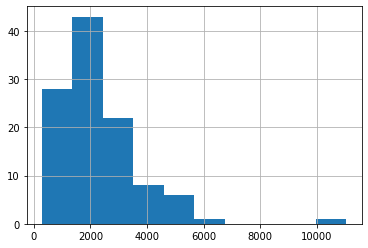

In [27]:
df.groupby('Prediction').mean()['retweet_count'].hist()

In [28]:
df_dog = df.groupby('Prediction').mean()

In [29]:
df_dog.sort_values(by='retweet_count', ascending=False).head()

,contributors,coordinates,favorite_count,favorited,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id_x,in_reply_to_status_id_str,...,in_reply_to_status_id_y,in_reply_to_user_id_y,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,img_num,Confidence,Dog_or_not
Prediction,,,,,,,,,,,,,,,,,,,,,
standard_poodle,NaN,NaN,25605.250000,0.0,NaN,7.346953e+17,7.346953e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.000000,10.0,1.0,0.511018,1.0
English_springer,NaN,NaN,15657.222222,0.0,NaN,7.204467e+17,7.204467e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.111111,10.0,1.0,0.546486,1.0
Afghan_hound,NaN,NaN,17305.000000,0.0,NaN,8.413147e+17,8.413147e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,13.000000,10.0,1.0,0.903712,1.0
giant_schnauzer,NaN,NaN,17314.500000,0.0,NaN,7.566625e+17,7.566625e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.500000,10.0,1.0,0.593866,1.0
Saluki,NaN,NaN,24060.000000,0.0,NaN,8.315403e+17,8.315403e+17,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,12.500000,10.0,1.0,0.523054,1.0


In [30]:
df[df['Prediction'] == 'standard_poodle']

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,expanded_urls,rating_numerator,rating_denominator,name,dog_type,jpg_url,img_num,Prediction,Confidence,Dog_or_not
215,NaN,NaN,2017-01-11 02:15:36,"[0, 83]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 819004789207928832, 'id_str'...",95450,False,This is Bo. He was a very good First Doggo. 14...,NaN,...,https://twitter.com/dog_rates/status/819004803...,14.0,10,Bo,Doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,1,standard_poodle,0.351308,True
420,NaN,NaN,2016-08-04 20:09:17,"[0, 106]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 761292941797326848, 'id_str'...",4957,False,Meet Bonaparte. He's pupset because it's cloud...,NaN,...,https://twitter.com/dog_rates/status/761292947...,11.0,10,Bonaparte,NaN,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg,1,standard_poodle,0.660893,True
776,NaN,NaN,2016-01-21 02:34:07,"[0, 103]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 689999372554207232, 'id_str'...",1561,False,This is Covach. He's trying to melt the snow. ...,NaN,...,https://twitter.com/dog_rates/status/689999384...,10.0,10,Covach,NaN,https://pbs.twimg.com/media/CZNexghWAAAYnT-.jpg,1,standard_poodle,0.444499,True
1120,NaN,NaN,2015-11-22 17:40:27,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 668484190623674369, 'id_str'...",453,False,Good teamwork between these dogs. One is on lo...,NaN,...,https://twitter.com/dog_rates/status/668484198...,9.0,10,None,NaN,https://pbs.twimg.com/media/CUbu1GAWsAEH3E-.jpg,1,standard_poodle,0.587372,True


In [31]:
df[df['Prediction'] == 'standard_poodle']['expanded_urls'].values[0]

'https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1,https://twitter.com/dog_rates/status/819004803107983360/photo/1'

In [32]:
df_dog.index

Index(['Afghan_hound', 'Airedale', 'American_Staffordshire_terrier',
       'Appenzeller', 'Australian_terrier', 'Bedlington_terrier',
       'Bernese_mountain_dog', 'Blenheim_spaniel', 'Border_collie',
       'Border_terrier',
       ...
       'schipperke', 'silky_terrier', 'soft-coated_wheaten_terrier',
       'standard_poodle', 'standard_schnauzer', 'toy_poodle', 'toy_terrier',
       'vizsla', 'whippet', 'wire-haired_fox_terrier'],
      dtype='object', name='Prediction', length=109)

(-1.0, 5.0)

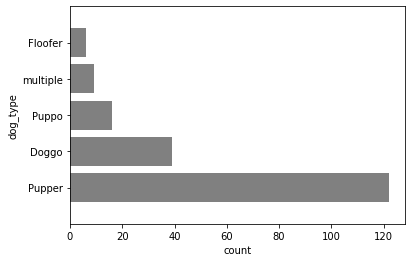

In [48]:
sns.countplot(y="dog_type", data=df, color="gray", order = df['dog_type'].value_counts().index)
plt.ylim([-1, 5])

(0.0, 25000.0)

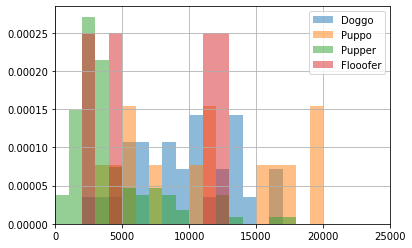

In [34]:
ax = df[df['dog_type']=='Doggo']['favorite_count'].hist(alpha=0.5, bins=np.linspace(0,20000,21), density=True)
df[df['dog_type']=='Puppo']['favorite_count'].hist(ax=ax, alpha=0.5, bins=np.linspace(0,20000,21), density=True)
df[df['dog_type']=='Pupper']['favorite_count'].hist(ax=ax, alpha=0.5, bins=np.linspace(0,20000,21), density=True)
df[df['dog_type']=='Floofer']['favorite_count'].hist(ax=ax, alpha=0.5, bins=np.linspace(0,20000,21), density=True)
ax.legend(['Doggo', 'Puppo', 'Pupper', 'Flooofer'])
plt.xlim([0, 25000])

(0.0, 20.0)

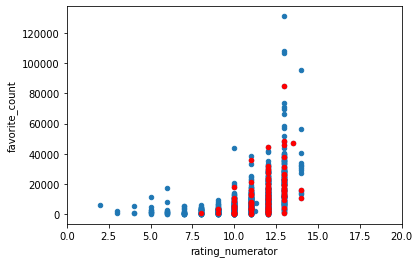

In [35]:
ax = df.plot.scatter(x='rating_numerator', y='favorite_count')
df[df["Prediction"] == "golden_retriever"].plot.scatter(x='rating_numerator', y='favorite_count', c='r', ax=ax)
plt.xlim([0,20])

(0.0, 50000.0)

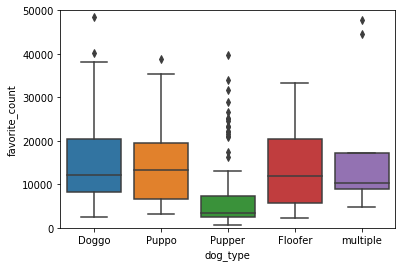

In [36]:
sns.boxplot(data=df, y='favorite_count', x='dog_type')
plt.ylim([0, 50000])

## Insight 2: Pupper tends not to be favorited and retweeted...

### (3)When we tweet if want to get more fav and retwt?

In [37]:
df['hour'] = 0
for i in range(len(df)):
    df.loc[i,'hour'] = df.loc[i, 'timestamp'].hour

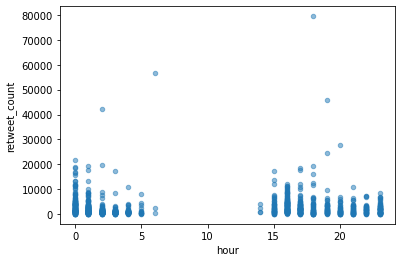

In [38]:
df.plot.scatter(x='hour', y='retweet_count', alpha=0.5)

(0.0, 60000.0)

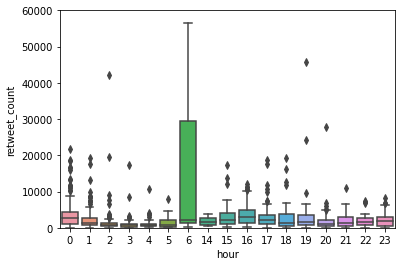

In [39]:
sns.boxplot(data=df, y='retweet_count', x='hour')
plt.ylim([0, 60000])

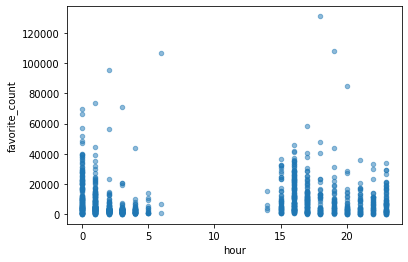

In [40]:
df.plot.scatter(x='hour', y='favorite_count', alpha=0.5)

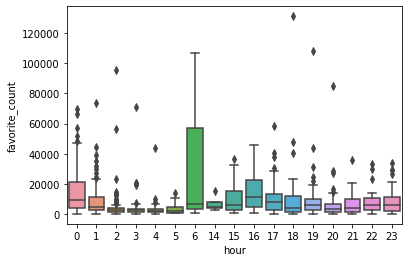

In [41]:
sns.boxplot(data=df, y='favorite_count', x='hour')
# plt.ylim([0, 70000])

## Insight 3: If you want to get more favorite and retweet, you should tweet around 4 p.m. or 0 a.m..

### (4) Which media, photo ore video is more preferd?

In [42]:
df[df['hour'] == 6]['expanded_urls'].values[0]

'https://twitter.com/dog_rates/status/807106840509214720/video/1'

In [43]:
df['media'] = 'photo'

In [44]:
for i in range(len(df)):
    if(df['expanded_urls'].values[i][-7:-2] == 'video'):
        df.loc[i, 'media'] = 'video'

In [45]:
df[df['media'] == 'video']

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,rating_denominator,name,dog_type,jpg_url,img_num,Prediction,Confidence,Dog_or_not,hour,media
13,NaN,NaN,2017-07-24 00:19:32,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 889278779352338437, 'id_str'...",25652,False,This is Oliver. You're witnessing one of his m...,NaN,...,10,Oliver,NaN,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,0,video
20,NaN,NaN,2017-07-18 16:08:03,"[0, 88]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 887343120832229379, 'id_str'...",34222,False,You may not have known you needed to see this ...,NaN,...,10,None,NaN,https://pbs.twimg.com/ext_tw_video_thumb/88734...,1,Mexican_hairless,0.330741,True,16,video
46,NaN,NaN,2017-06-26 19:07:24,"[0, 82]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 879415784908390401, 'id_str'...",107956,False,This is Duddles. He did an attempt. 13/10 some...,NaN,...,10,Duddles,NaN,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,English_springer,0.383404,True,19,video
90,NaN,NaN,2017-05-14 00:34:33,"[0, 91]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 863553036815355904, 'id_str'...",15935,False,This is Neptune. He's a backpup vocalist for t...,NaN,...,10,Neptune,NaN,https://pbs.twimg.com/ext_tw_video_thumb/86355...,1,Eskimo_dog,0.413330,True,0,video
144,NaN,NaN,2017-03-13 15:47:01,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 841311812641533952, 'id_str'...",17305,False,This is Max. There's no way in h*ck you're tak...,NaN,...,10,Max,NaN,https://pbs.twimg.com/ext_tw_video_thumb/84131...,1,Afghan_hound,0.903712,True,15,video
174,NaN,NaN,2017-02-13 01:46:03,"[0, 60]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830956118893543424, 'id_str'...",8735,False,Say hello to Reggie. He hates puns. 12/10 ligh...,NaN,...,10,Reggie,NaN,https://pbs.twimg.com/ext_tw_video_thumb/83095...,1,kuvasz,0.451516,True,1,video
210,NaN,NaN,2017-01-17 17:21:47,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 821407155391725568, 'id_str'...",13075,False,This is Sundance. He's a doggo drummer. Even s...,NaN,...,10,Sundance,Doggo,https://pbs.twimg.com/ext_tw_video_thumb/82140...,1,Irish_setter,0.505496,True,17,video
211,NaN,NaN,2017-01-17 00:18:04,"[0, 62]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 821149477142556673, 'id_str'...",9718,False,This is Luca. He got caught howling. H*ckin em...,NaN,...,10,Luca,NaN,https://pbs.twimg.com/ext_tw_video_thumb/82114...,1,German_shepherd,0.515933,True,0,video
220,NaN,NaN,2017-01-07 16:59:28,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 817777588030476288, 'id_str'...",11901,False,"This is Dido. She's playing the lead role in ""...",NaN,...,10,Dido,multiple,https://pbs.twimg.com/ext_tw_video_thumb/81777...,1,curly-coated_retriever,0.733256,True,16,video
229,NaN,NaN,2017-01-02 17:00:46,"[0, 57]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 815965888126062592, 'id_str'...",25057,False,Here's a pupper with squeaky hiccups. Please e...,NaN,...,10,None,Pupper,https://pbs.twimg.com/ext_tw_video_thumb/81596...,1,Tibetan_mastiff,0.506312,True,17,video


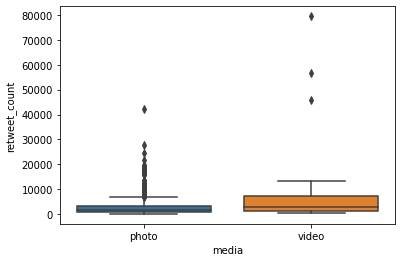

In [46]:
sns.boxplot(data=df, y='retweet_count', x='media')
# plt.ylim([0, 20000])

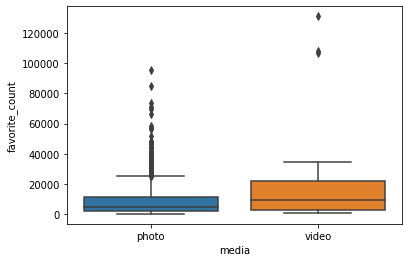

In [47]:
sns.boxplot(data=df, y='favorite_count', x='media')
# plt.ylim([0, 40000])

### Insight 4: Video is more preffred than photo.